<a href="https://colab.research.google.com/github/yatharthsameer/AI-For-Economics/blob/main/ETH_price_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETH Stock price Prediction using LSTM

![](https://media0.giphy.com/media/f67U9Xc53i4ViUs5T2/giphy.gif?cid=ecf05e47h4dpv8s5ppc6omcbb5uzwprey8y97x3fy8qk8dk8&rid=giphy.gif&ct=g)

<iframe width="1024" height="576" src="https://www.youtube.com/embed/p-QY7JNGD60" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# [](http://) Table of Content
<hr style='height:2px'>

## 1. What is LSTM?
## 2. Importing Library
## 3. Loading Dataset
## 4. EDA
## 5. Biulding Model
## 6. Prediction
## 7. Evaluation
## 8. Conclusion
<hr style='height:2px'>

# 1. What is LSTM ?

* ###  Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

* ### Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

* ### LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.

![image](https://blog.floydhub.com/content/images/2019/06/Slide19.JPG)

# 2. Importing Library

In [59]:
# First we will import the necessary Library

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# 3. Loading Dataset

#  [We can use this link to download bitcoin dataset from yahoo finance](https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD)

In [60]:
# Load our dataset
# Note it should be in same dir


maindf=pd.read_csv('./ETH-USD.csv')

In [61]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  2193
Total number of fields present in the dataset:  7


In [62]:
maindf.shape

(2193, 7)

In [63]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [64]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2188,2021-09-09,3452.548340,3562.992676,3400.517090,3427.340088,3427.340088,2.411806e+10
2189,2021-09-10,3425.564941,3512.571289,3157.059082,3211.505859,3211.505859,2.235597e+10
2190,2021-09-11,3209.030518,3346.526367,3208.961914,3270.278076,3270.278076,1.862712e+10
2191,2021-09-12,3270.291748,3462.468262,3235.109375,3410.134521,3410.134521,1.681041e+10
2192,2021-09-13,3407.862305,3426.502197,3179.553711,3223.280518,3223.280518,1.754634e+10


In [65]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2189 non-null   float64
 2   High       2189 non-null   float64
 3   Low        2189 non-null   float64
 4   Close      2189 non-null   float64
 5   Adj Close  2189 non-null   float64
 6   Volume     2189 non-null   float64
dtypes: float64(6), object(1)
memory usage: 120.1+ KB


In [66]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2189.000000,2189.000000,2189.000000,2189.000000,2189.000000,2.189000e+03
mean,466.105352,484.240219,446.117169,467.539240,467.539240,7.595310e+09
std,738.298764,769.220209,703.635675,740.661346,740.661346,1.085636e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,23.504900,29.932899,23.504900,28.592899,28.592899,6.978360e+07
50%,208.885437,214.001999,202.370346,209.091003,209.091003,2.426270e+09
75%,433.350586,444.243011,419.683014,433.786621,433.786621,1.062276e+10
max,4174.635742,4362.350586,3868.994385,4168.701172,4168.701172,8.448291e+10


# Checking for Null Values

In [67]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 24


In [68]:
print('NA values:',maindf.isnull().values.any())

NA values: True


In [69]:
# If dataset had null values we can use this code to drop all the null values present in the dataset

# maindf=maindf.dropna()
# print('Null Values:',maindf.isnull().values.sum())
# print('NA values:',maindf.isnull().values.any())

In [70]:
# Final shape of the dataset after dealing with null values

maindf.shape

(2193, 7)

# 4. EDA(Exploratory Data Analysis)

In [71]:
# Printing the start date and End date of the dataset

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 2015-09-13
Ending Date 2021-09-13


#### StockPrice Analysis from Start

In [72]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2014 = maindf.loc[(maindf['Date'] >= '2015-09-13')
                     & (maindf['Date'] < '2015-12-31')]

y_2014.drop(y_2014[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2015-09-13,1.041780,1.042700,0.902832,0.936003
1,2015-09-14,0.940566,0.949387,0.871760,0.875622
2,2015-09-15,0.875189,1.045540,0.875189,0.944410
3,2015-09-16,0.941977,0.952698,0.901639,0.907175
4,2015-09-17,0.906865,0.909204,0.831132,0.874231
...,...,...,...,...,...
104,2015-12-26,0.870766,0.897453,0.838314,0.854603
105,2015-12-27,0.853166,0.861538,0.841151,0.856365
106,2015-12-28,0.856356,0.872394,0.832932,0.845005
107,2015-12-29,0.843835,0.873054,0.833232,0.873054


In [73]:
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,0.849233,0.831418


 Note that we only have few months in 2014 so the rest of the months are **NaN**

In [74]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

Note that we only have few months in 2014 so the rest of the months are not plotted since we do not have the data

In [75]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

Note that we only have few months in 2014 so the rest of the months are not plotted since we do not have the data

In [76]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'],
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2015

In [77]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2015 = maindf.loc[(maindf['Date'] >= '2015-01-01')
                     & (maindf['Date'] < '2016-01-01')]

y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2015-09-13,1.041780,1.042700,0.902832,0.936003
1,2015-09-14,0.940566,0.949387,0.871760,0.875622
2,2015-09-15,0.875189,1.045540,0.875189,0.944410
3,2015-09-16,0.941977,0.952698,0.901639,0.907175
4,2015-09-17,0.906865,0.909204,0.831132,0.874231
...,...,...,...,...,...
105,2015-12-27,0.853166,0.861538,0.841151,0.856365
106,2015-12-28,0.856356,0.872394,0.832932,0.845005
107,2015-12-29,0.843835,0.873054,0.833232,0.873054
108,2015-12-30,0.874258,0.941099,0.866647,0.911958


In [78]:
monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,NaN,NaN
February,NaN,NaN
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,0.849233,0.831418


In [79]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [80]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [81]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'],
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2016

In [82]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2016 = maindf.loc[(maindf['Date'] >= '2016-01-01')
                     & (maindf['Date'] < '2017-01-01')]

y_2016.drop(y_2016[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
110,2016-01-01,0.933712,0.954822,0.931442,0.948024
111,2016-01-02,0.947401,0.969637,0.936560,0.937124
112,2016-01-03,0.938430,0.991362,0.934313,0.971905
113,2016-01-04,0.972045,0.976438,0.929835,0.954480
114,2016-01-05,0.953147,0.970597,0.946543,0.950176
...,...,...,...,...,...
471,2016-12-27,7.276370,7.322580,7.090470,7.170820
472,2016-12-28,7.148950,7.624060,7.082250,7.520110
473,2016-12-29,7.539130,8.527410,7.539130,8.284160
474,2016-12-30,8.289880,8.466090,8.054680,8.159980


In [83]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1.449814,1.494696
February,4.412768,4.545909
March,11.043763,11.174799
April,9.033581,8.943613
May,11.206029,11.364835
June,14.396933,14.343447
July,11.890916,11.873155
August,11.122658,11.112815
September,12.421323,12.470140


In [84]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [85]:
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2016.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [86]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'],
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2017

In [87]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2017 = maindf.loc[(maindf['Date'] >= '2017-01-01')
                     & (maindf['Date'] < '2018-01-01')]

y_2017.drop(y_2017[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
476,2017-01-01,7.982310,8.471230,7.982310,8.172570
477,2017-01-02,8.170870,8.436330,8.054410,8.378510
478,2017-01-03,8.374580,9.996800,8.317170,9.725250
479,2017-01-04,9.709290,11.276400,9.559810,11.251600
480,2017-01-05,11.286800,11.890900,9.402680,10.254400
...,...,...,...,...,...
836,2017-12-27,774.969971,789.252991,738.413025,762.841980
837,2017-12-28,762.208008,763.318970,701.187012,737.023010
838,2017-12-29,740.388977,770.117004,729.607971,753.591980
839,2017-12-30,753.815002,753.815002,685.231018,717.257019


In [88]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,10.117105,10.201401
February,12.193743,12.370811
March,33.746036,34.791171
April,49.387587,50.336560
May,120.841848,125.748887
June,311.473300,313.733601
July,227.233677,224.124292
August,295.893741,301.608741
September,295.872334,293.048068


In [89]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [90]:
y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2017.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2017.groupby(y_2017['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [91]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'],
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2018

In [92]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2018 = maindf.loc[(maindf['Date'] >= '2018-01-01')
                     & (maindf['Date'] < '2019-01-01')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
841,2018-01-01,755.757019,782.530029,742.004028,772.640991
842,2018-01-02,772.346008,914.830017,772.346008,884.443970
843,2018-01-03,886.000000,974.471008,868.450989,962.719971
844,2018-01-04,961.713013,1045.079956,946.085999,980.921997
845,2018-01-05,975.750000,1075.390015,956.325012,997.719971
...,...,...,...,...,...
1201,2018-12-27,131.923584,132.677063,115.650101,116.575912
1202,2018-12-28,116.898201,137.647018,115.693130,137.647018
1203,2018-12-29,138.468781,147.034332,134.570175,138.018341
1204,2018-12-30,137.627457,140.689087,133.982330,139.859451


In [93]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1093.099893,1103.646004
February,882.527006,873.116318
March,640.787129,625.761325
April,512.148933,521.103667
May,682.046129,678.795519
June,524.591968,520.528231
July,464.046514,463.327677
August,327.069223,322.050938
September,229.290601,227.460833


In [94]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [95]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [96]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'],
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2019

In [97]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2019 = maindf.loc[(maindf['Date'] >= '2019-01-01')
                     & (maindf['Date'] < '2020-01-01')]

y_2019.drop(y_2019[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1206,2019-01-01,133.418152,141.397507,132.650711,140.819412
1207,2019-01-02,141.519516,156.929138,140.650955,155.047684
1208,2019-01-03,155.196045,155.863052,147.198364,149.135010
1209,2019-01-04,148.912888,156.878983,147.907104,154.581940
1210,2019-01-05,154.337418,160.824890,154.337418,155.638596
...,...,...,...,...,...
1566,2019-12-27,126.368797,128.097565,124.820808,127.214607
1567,2019-12-28,127.213013,130.258163,126.899696,128.322708
1568,2019-12-29,128.266876,136.811203,127.997658,134.757980
1569,2019-12-30,134.796524,136.757355,131.545563,132.633484


In [98]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,129.056986,128.174619
February,126.112229,127.220948
March,137.202461,137.327039
April,164.899545,165.603831
May,216.730067,220.185853
June,274.005168,274.758299
July,250.595550,248.289667
August,201.309426,199.817084
September,185.712475,185.992064


In [99]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [100]:
y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2019.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [101]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Open'], y_2019['Close'],
                                          y_2019['High'], y_2019['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2020

In [102]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2020 = maindf.loc[(maindf['Date'] >= '2020-01-01')
                     & (maindf['Date'] < '2021-01-01')]

y_2020.drop(y_2020[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1571,2020-01-01,129.630661,132.835358,129.198288,130.802002
1572,2020-01-02,130.820038,130.820038,126.954910,127.410179
1573,2020-01-03,127.411263,134.554016,126.490021,134.171707
1574,2020-01-04,134.168518,136.052719,133.040558,135.069366
1575,2020-01-05,135.072098,139.410202,135.045624,136.276779
...,...,...,...,...,...
1932,2020-12-27,635.887146,711.393555,628.334961,682.642334
1933,2020-12-28,683.205811,745.877747,683.205811,730.397339
1934,2020-12-29,730.358704,737.952881,692.149414,731.520142
1935,2020-12-30,731.472839,754.303223,720.988892,751.618958


In [103]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,155.320137,156.972718
February,237.377253,238.756287
March,163.235093,160.376243
April,169.391965,171.957624
May,207.346755,208.125855
June,236.268403,236.159229
July,255.554494,259.405542
August,399.326147,402.153482
September,370.860736,368.336064


In [104]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [105]:
y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2020.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [106]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Open'], y_2020['Close'],
                                          y_2020['High'], y_2020['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2021

In [107]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2021 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2021-12-31')]

y_2021.drop(y_2021[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1937,2021-01-01,737.708374,749.201843,719.792236,730.367554
1938,2021-01-02,730.402649,786.798462,718.109497,774.534973
1939,2021-01-03,774.511841,1006.565002,771.561646,975.507690
1940,2021-01-04,977.058838,1153.189209,912.305359,1040.233032
1941,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104
...,...,...,...,...,...
2188,2021-09-09,3452.548340,3562.992676,3400.517090,3427.340088
2189,2021-09-10,3425.564941,3512.571289,3157.059082,3211.505859
2190,2021-09-11,3209.030518,3346.526367,3208.961914,3270.278076
2191,2021-09-12,3270.291748,3462.468262,3235.109375,3410.134521


In [108]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1184.997553,1201.393435
February,1696.234375,1699.808921
March,1720.526655,1736.862222
April,2269.130294,2297.672754
May,3142.513688,3140.730760
June,2349.590800,2335.792391
July,2122.466194,2131.080362
August,3069.708630,3098.384939
September,3610.710956,3600.078670


#### Since we had data till 24-08-2021 in Months after August its showing NaN

In [109]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [110]:
y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2021.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [111]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Open'], y_2021['Close'],
                                          y_2021['High'], y_2021['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [112]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_2022 = maindf.loc[(maindf['Date'] >= '2021-01-01')
                     & (maindf['Date'] < '2021-09-13')]

y_2022.drop(y_2015[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
1937,2021-01-01,737.708374,749.201843,719.792236,730.367554
1938,2021-01-02,730.402649,786.798462,718.109497,774.534973
1939,2021-01-03,774.511841,1006.565002,771.561646,975.507690
1940,2021-01-04,977.058838,1153.189209,912.305359,1040.233032
1941,2021-01-05,1041.498779,1129.371460,986.811279,1100.006104
...,...,...,...,...,...
2187,2021-09-08,3428.378174,3559.121338,3224.764893,3497.315186
2188,2021-09-09,3452.548340,3562.992676,3400.517090,3427.340088
2189,2021-09-10,3425.564941,3512.571289,3157.059082,3211.505859
2190,2021-09-11,3209.030518,3346.526367,3208.961914,3270.278076


In [113]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1184.997553,1201.393435
February,1696.234375,1699.808921
March,1720.526655,1736.862222
April,2269.130294,2297.672754
May,3142.513688,3140.730760
June,2349.590800,2335.792391
July,2122.466194,2131.080362
August,3069.708630,3098.384939
September,3627.615011,3631.478516


In [114]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [115]:
y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2022.groupby(maindf['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price')
fig.show()

In [116]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Open'], y_2022['Close'],
                                          y_2022['High'], y_2022['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall Analysis from 2014-2022

In [117]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2015-09-13')
                     & (maindf['Date'] <= '2021-09-13')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2015-09-13,1.041780,1.042700,0.902832,0.936003
1,2015-09-14,0.940566,0.949387,0.871760,0.875622
2,2015-09-15,0.875189,1.045540,0.875189,0.944410
3,2015-09-16,0.941977,0.952698,0.901639,0.907175
4,2015-09-17,0.906865,0.909204,0.831132,0.874231
...,...,...,...,...,...
2188,2021-09-09,3452.548340,3562.992676,3400.517090,3427.340088
2189,2021-09-10,3425.564941,3512.571289,3157.059082,3211.505859
2190,2021-09-11,3209.030518,3346.526367,3208.961914,3270.278076
2191,2021-09-12,3270.291748,3462.468262,3235.109375,3410.134521


In [118]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,429.006915,433.647145
February,488.763509,488.271998
March,451.090189,451.048800
April,531.007627,537.969742
May,730.114086,730.825285
June,618.387762,615.885866
July,555.297891,556.350116
August,717.404971,722.521333
September,440.769352,438.868527


In [119]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# 5. Building LSTM Model

* ## First Step is Preparing Data for Training and Testing

* ## Here we are just considering 1 year data for training data

* ## Since Bitcoin price has drastically flucated from 200 dollar in year 2014 to 15000 dollar in year 2018 to 3000 dollar in year 2019(theses values are apporx) so we will just consider 1 Year to avoid this type of flucation in the data.

* ## As we want to predict Close Price of the Bitcoin so we are just Considering Close aand Date  

In [120]:
# Lets First Take all the Close Price
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2193, 2)


In [121]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white',
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 1 Year

In [122]:
closedf = closedf[closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  206


In [123]:
closedf

,Date,Close
1987,2021-02-20,1919.534058
1988,2021-02-21,1935.601074
1989,2021-02-22,1781.992920
1990,2021-02-23,1570.203979
1991,2021-02-24,1626.575684
...,...,...
2188,2021-09-09,3427.340088
2189,2021-09-10,3211.505859
2190,2021-09-11,3270.278076
2191,2021-09-12,3410.134521


In [124]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price',
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [125]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(206, 1)


* ### Slicing data into Training set and Testing set

In [126]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (123, 1)
test_data:  (83, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [127]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [128]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (107, 15)
y_train:  (107,)
X_test:  (67, 15)
y_test (67,)


In [129]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (107, 15, 1)
X_test:  (67, 15, 1)


* # Actuall Model Building

In [130]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [131]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
4/4 [==============================] - 1s 87ms/step - loss: 0.3005 - val_loss: 0.4708
Epoch 2/200
4/4 [==============================] - 0s 11ms/step - loss: 0.2812 - val_loss: 0.4425
Epoch 3/200
4/4 [==============================] - 0s 19ms/step - loss: 0.2620 - val_loss: 0.4153
Epoch 4/200
4/4 [==============================] - 0s 16ms/step - loss: 0.2445 - val_loss: 0.3889
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 0.2273 - val_loss: 0.3635
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.2107 - val_loss: 0.3396
Epoch 7/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1952 - val_loss: 0.3165
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1801 - val_loss: 0.2938
Epoch 9/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1658 - val_loss: 0.2712
Epoch 10/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1512 - val_loss: 0.2487
Epoch 11/200
4/4 [=

- ### Plotting Loss vs Validation loss

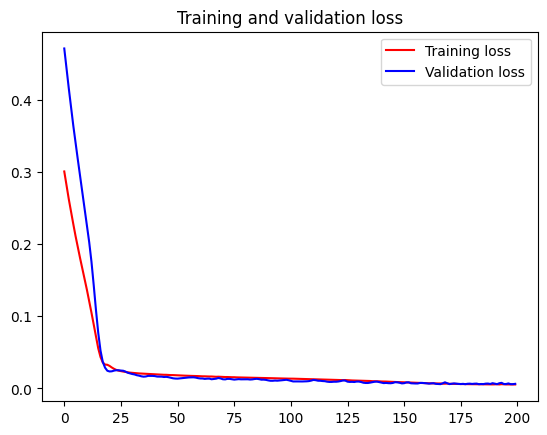

<Figure size 640x480 with 0 Axes>

In [132]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [133]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 3ms/step


((107, 1), (67, 1))

- # Model Evaluation

In [134]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

- ## Evaluation metrices RMSE, MSE and MAE

In [135]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  203.4646860352563
Train data MSE:  41397.87846342542
Train data MAE:  160.09885978555786
-------------------------------------------------------------------------------------
Test data RMSE:  219.6463488616621
Test data MSE:  48244.518568258965
Test data MAE:  179.5873805006996


- ## Variance Regression Score

In [136]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8911287263036212
Test data explained variance regression score: 0.8804459856113344


- ## R square score for regression

In [137]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8909984370897843
Test data R2 score: 0.8764162283382279


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [138]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.006724573112789512
Test data MGD:  0.006295697348680514
----------------------------------------------------------------------
Train data MPD:  16.382055811624866
Test data MPD:  16.97854626631086


- # Comparision of original stock close price and predicted close price

In [139]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (206, 1)
Test predicted data:  (206, 1)


- # Predicting next 30 days

In [140]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


- # Plotting last 15 days of dataset and next predicted 30 days

In [141]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [142]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [143]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Thats it we are Done with Bitcoin Price Prediction using LSTM.

![](https://c.tenor.com/nhmb_FF2W1IAAAAM/yaya-for-me-bye.gif)